In [13]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [14]:
df_40=pd.read_csv('D:/Projects/Uczelnia/AiBD/Lab_6/exercise.csv', delimiter=';')

In [15]:
df = df_40.head(40)
df

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [23]:
results = smf.ols('y ~ x1', data=df).fit()
wyn=results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     6.890
Date:                Wed, 11 Dec 2019   Prob (F-statistic):             0.0124
Time:                        14:44:16   Log-Likelihood:                -119.47
No. Observations:                  40   AIC:                             242.9
Df Residuals:                      38   BIC:                             246.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0633      1.553      6.481      0.000       6.920      13.206
x1             0.6559      0.250      2.625      0.012       0.150       1.162
==============================================================================
Omnibus:                       13.821   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.043
Skew:                          -0.122   Prob(JB):                        0.218
Kurtosis:                       1.671   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

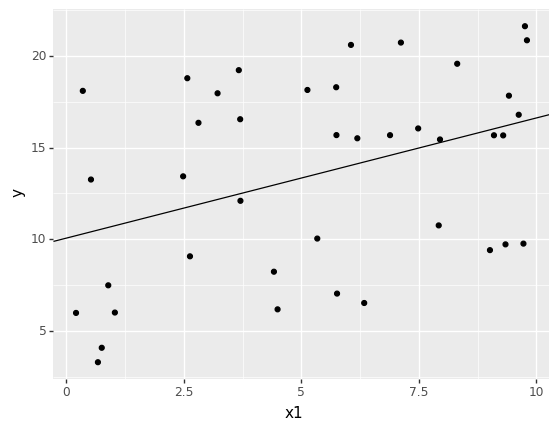

<ggplot: (17388855)>

In [18]:
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1

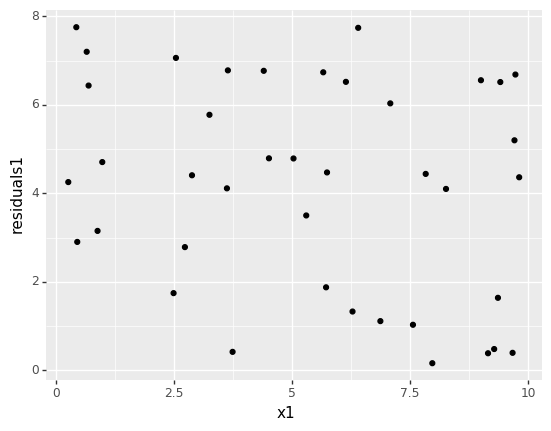

<ggplot: (4880519)>

In [42]:
dft = df.tail(40).copy()
dft['predict1']=results.predict()
dft['residuals1']=abs(dft['y'] - dft['predict1'])
fig2 = (p9.ggplot(p9.aes(x='x1', y='residuals1'), data=dft)
       +p9.geom_point())
fig2

In [19]:
results2 = smf.ols('y ~ x2', data=df).fit()
wyn2=results2.params

In [20]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     275.2
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           5.38e-19
Time:                        14:41:50   Log-Likelihood:                -80.617
No. Observations:                  40   AIC:                             165.2
Df Residuals:                      38   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7853      0.660      5.732      0.000       2.448       5.122
x2             0.8322      0.050     16.589      0.000       0.731       0.934
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.221
Skew:                           0.600   Prob(JB):                        0.200
Kurtosis:                       3.701   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

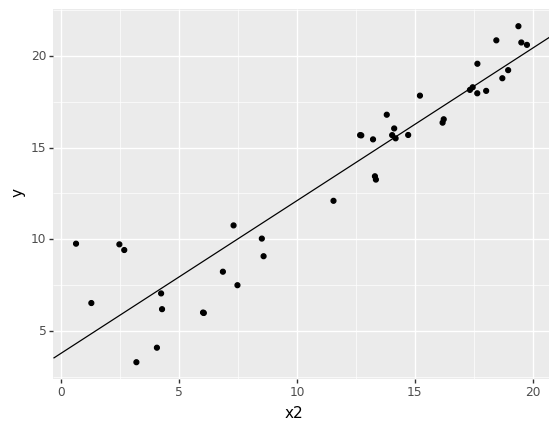

<ggplot: (4767457)>

In [41]:
fig3=(p9.ggplot(p9.aes(x='x2',y='y'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn2['Intercept'],slope=wyn2['x2'])))
fig3

In [43]:
dft = df.tail(40).copy()
dft['predict2']=results2.predict()
dft['residuals2']=abs(dft['y'] - dft['predict2'])

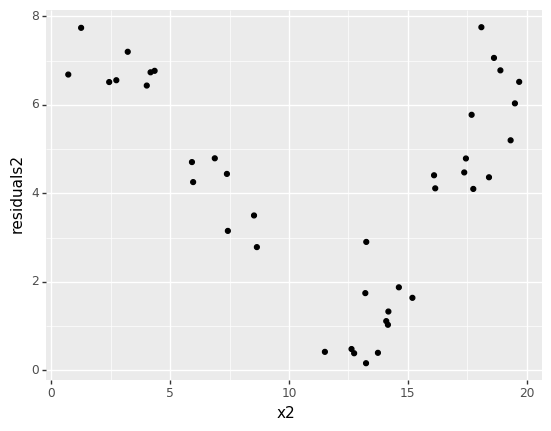

<ggplot: (17555249)>

In [44]:
fig = (p9.ggplot(p9.aes(x='x2', y='residuals2'), data=dft)
       +p9.geom_point())
fig4